In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

from collections import Counter
import itertools

plt.style.use('ggplot')
cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
df = pd.read_csv('regression_models_summary.csv')

### ***Best pipelines*** ###

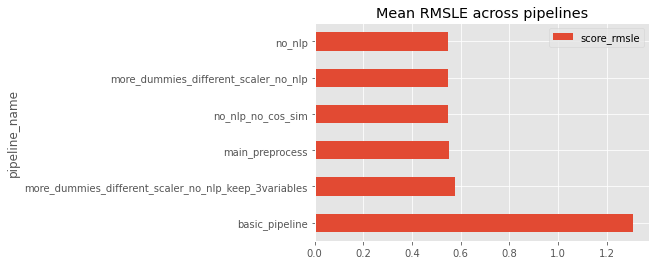

In [4]:
df[['pipeline_name','score_rmsle']].groupby('pipeline_name').agg('mean').sort_values('score_rmsle', ascending= False).plot(kind='barh');
plt.title('Mean RMSLE across pipelines');

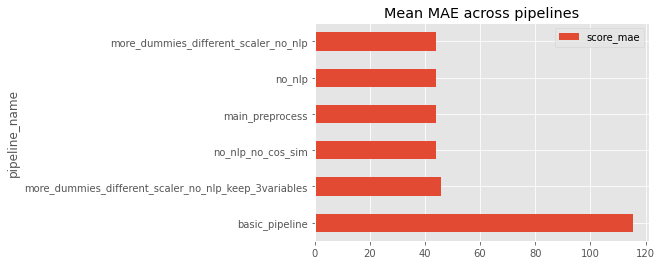

In [5]:
df[['pipeline_name','score_mae']].groupby('pipeline_name').agg('mean').sort_values('score_mae', ascending= False).plot(kind='barh');
plt.title('Mean MAE across pipelines');

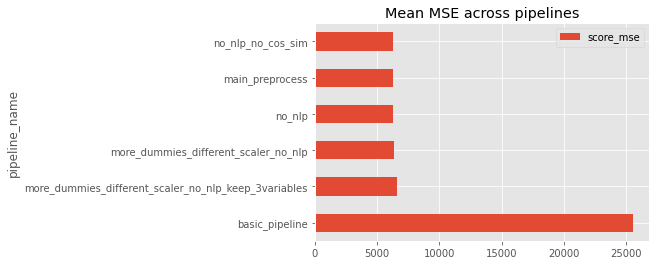

In [6]:
df[['pipeline_name','score_mse']].groupby('pipeline_name').agg('mean').sort_values('score_mse', ascending= False).plot(kind='barh');
plt.title('Mean MSE across pipelines');

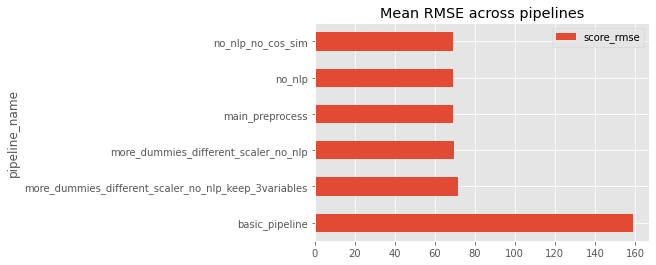

In [7]:
df[['pipeline_name','score_rmse']].groupby('pipeline_name').agg('mean').sort_values('score_rmse', ascending= False).plot(kind='barh');
plt.title('Mean RMSE across pipelines');

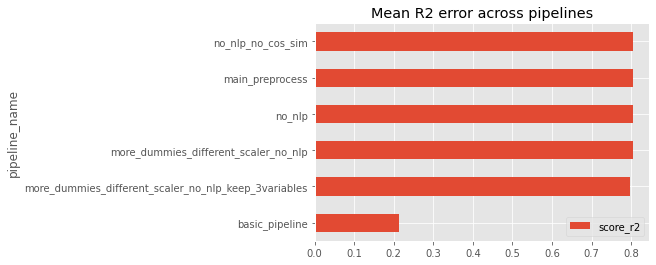

In [8]:
df[['pipeline_name','score_r2']].groupby('pipeline_name').agg('mean').sort_values('score_r2', ascending= True).plot(kind='barh');
plt.title('Mean R2 error across pipelines');

### ***Best models*** ###

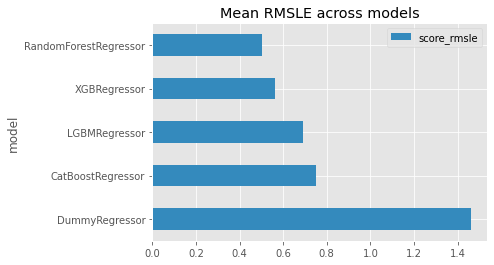

In [9]:
df[['model','score_rmsle']].groupby('model').agg('mean').sort_values('score_rmsle', ascending= False).plot(kind='barh', color = cycle_colors[1]);
plt.title('Mean RMSLE across models');

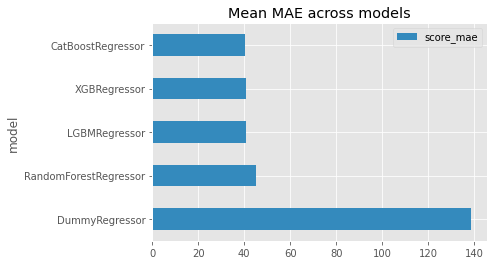

In [10]:
df[['model','score_mae']].groupby('model').agg('mean').sort_values('score_mae', ascending= False).plot(kind='barh', color = cycle_colors[1]);
plt.title('Mean MAE across models');

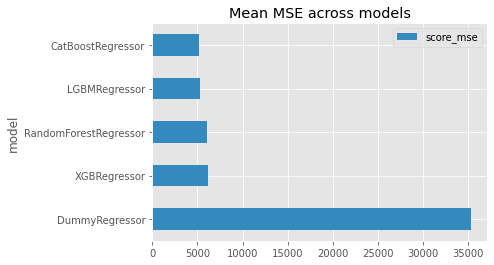

In [11]:
df[['model','score_mse']].groupby('model').agg('mean').sort_values('score_mse', ascending= False).plot(kind='barh', color = cycle_colors[1]);
plt.title('Mean MSE across models');

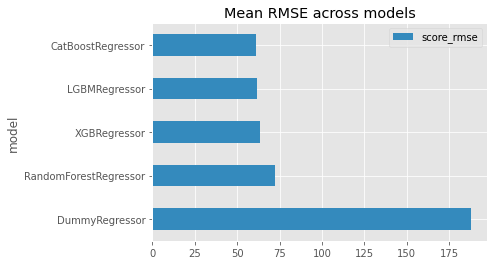

In [12]:
df[['model','score_rmse']].groupby('model').agg('mean').sort_values('score_rmse', ascending= False).plot(kind='barh', color = cycle_colors[1]);
plt.title('Mean RMSE across models');

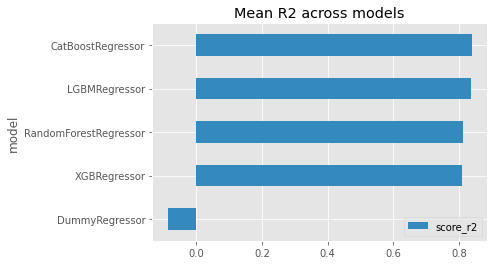

In [13]:
df[['model','score_r2']].groupby('model').agg('mean').sort_values('score_r2', ascending= True).plot(kind='barh', color = cycle_colors[1]);
plt.title('Mean R2 across models');

### ***Best features*** ###

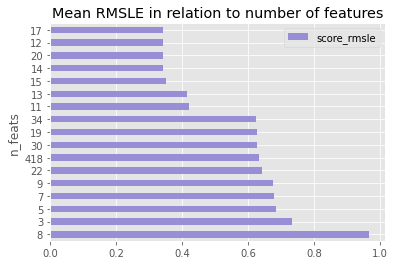

In [14]:
df[['n_feats','score_rmsle']].groupby('n_feats').agg('mean').sort_values('score_rmsle', ascending= False).plot(kind='barh', color = cycle_colors[2]);
plt.title('Mean RMSLE in relation to number of features');

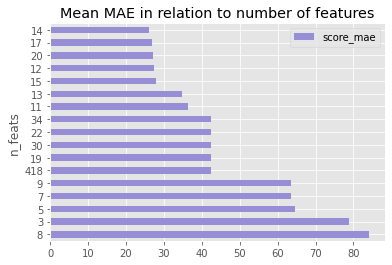

In [27]:
df[['n_feats','score_mae']].groupby('n_feats').agg('mean').sort_values('score_mae', ascending= False).plot(kind='barh', color = cycle_colors[2]);
plt.title('Mean MAE in relation to number of features');

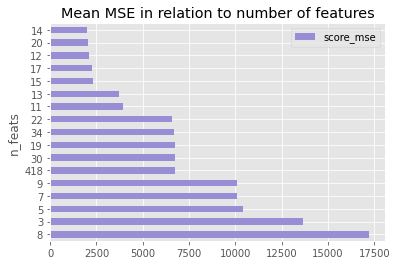

In [29]:
df[['n_feats','score_mse']].groupby('n_feats').agg('mean').sort_values('score_mse', ascending= False).plot(kind='barh', color = cycle_colors[2]);
plt.title('Mean MSE in relation to number of features');

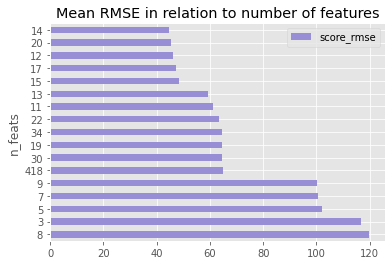

In [30]:
df[['n_feats','score_rmse']].groupby('n_feats').agg('mean').sort_values('score_rmse', ascending= False).plot(kind='barh', color = cycle_colors[2]);
plt.title('Mean RMSE in relation to number of features');

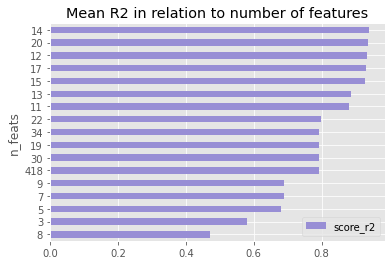

In [31]:
df[['n_feats','score_r2']].groupby('n_feats').agg('mean').sort_values('score_r2', ascending= True).plot(kind='barh', color = cycle_colors[2]);
plt.title('Mean R2 in relation to number of features');

In [92]:
# Top 5 feature sets 
top_n_feats = [17, 12, 20, 14, 15]
top_feats_dict = dict()
for nfeats in top_n_feats:
    top_feats_dict[nfeats] = ast.literal_eval(df[df['n_feats'] == nfeats]['feats'].tolist()[0])

In [79]:
top_feats_dict

{17: ['workingday',
  'atemp',
  'count',
  'year',
  'month',
  'day',
  'hour',
  'dayofweek',
  'weekend',
  'mean',
  'median',
  'season_1',
  'season_2',
  'season_3',
  'season_4',
  'weather_1',
  'weather_2'],
 12: ['workingday',
  'weather',
  'count',
  'year',
  'month',
  'day',
  'hour',
  'dayofweek',
  'mean',
  'median',
  'Clear',
  'Partlycloudy'],
 20: ['workingday',
  'weather',
  'count',
  'year',
  'month',
  'day',
  'hour',
  'dayofweek',
  'weekend',
  'mean',
  'median',
  'season_1',
  'season_2',
  'season_3',
  'season_4',
  'Clear',
  'Partlycloudy',
  'Cloudy',
  'Brokenclouds',
  'Mist'],
 14: ['workingday',
  'temp',
  'atemp',
  'humidity',
  'windspeed',
  'count',
  'year',
  'month',
  'day',
  'hour',
  'dayofweek',
  'mean',
  'median',
  'weather_1'],
 15: ['workingday',
  'atemp',
  'year',
  'month',
  'hour',
  'dayofweek',
  'mean',
  'median',
  'season_1',
  'season_2',
  'season_3',
  'season_4',
  'weather_1',
  'weather_2',
  'count']}

In [91]:
# Frequency of features in top 5 feature sets
merged = list(itertools.chain.from_iterable([v for v in top_feats_dict.values()]))
cnt = Counter()
cnt.update(merged)

sorted(cnt.items(), key = lambda i: i[1])

[('Cloudy', 1),
 ('Brokenclouds', 1),
 ('Mist', 1),
 ('temp', 1),
 ('humidity', 1),
 ('windspeed', 1),
 ('weekend', 2),
 ('weather_2', 2),
 ('weather', 2),
 ('Clear', 2),
 ('Partlycloudy', 2),
 ('atemp', 3),
 ('season_1', 3),
 ('season_2', 3),
 ('season_3', 3),
 ('season_4', 3),
 ('weather_1', 3),
 ('day', 4),
 ('workingday', 5),
 ('count', 5),
 ('year', 5),
 ('month', 5),
 ('hour', 5),
 ('dayofweek', 5),
 ('mean', 5),
 ('median', 5)]

### ***Best feature selection method*** ###

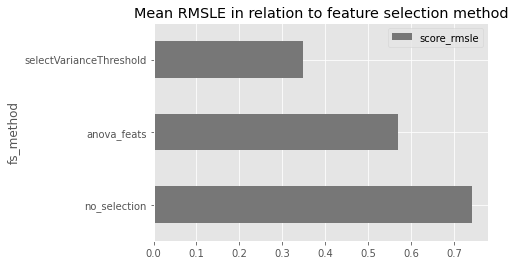

In [64]:
df[['fs_method','score_rmsle']].groupby('fs_method').agg('mean').sort_values('score_rmsle', ascending= False).plot(kind='barh', color = cycle_colors[3]);
plt.title('Mean RMSLE in relation to feature selection method');

In [55]:
df[['score_rmsle', 'fs_method', 'pipeline_name']].groupby(['fs_method', 'pipeline_name']).agg('mean').sort_values(by='score_rmsle')

score_rmsle
fs_method               pipeline_name                                                  
selectVarianceThreshold main_preprocess                                        0.347504
                        no_nlp                                                 0.347977
                        more_dummies_different_scaler_no_nlp_keep_3vari...     0.348486
                        no_nlp_no_cos_sim                                      0.349548
                        more_dummies_different_scaler_no_nlp                   0.351155
anova_feats             more_dummies_different_scaler_no_nlp                   0.556379
                        main_preprocess                                        0.556669
                        no_nlp_no_cos_sim                                      0.556996
                        no_nlp                                                 0.558720
                        more_dummies_different_scaler_no_nlp_keep_3vari...     0.614963
no_selection            no_nlp                                                 0.622962
                        more_dummies_different_scaler_no_nlp                   0.625958
                        no_nlp_no_cos_sim                                      0.626489
                        main_preprocess                                        0.631671
                        more_dummies_different_scaler_no_nlp_keep_3vari...     0.640512
                        basic_pipeline                                         1.309705

In [63]:
df[df['fs_method'] == 'selectVarianceThreshold'][['fs_param_value', 'score_rmsle']].groupby('fs_param_value').agg('median')

,score_rmsle
fs_param_value,
0.1,0.341355
0.2,0.342074
0.3,0.362125


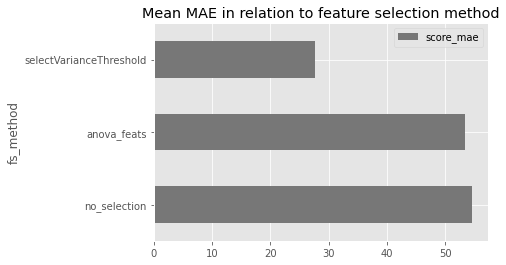

In [66]:
df[['fs_method','score_mae']].groupby('fs_method').agg('mean').sort_values('score_mae', ascending= False).plot(kind='barh', color = cycle_colors[3]);
plt.title('Mean MAE in relation to feature selection method');

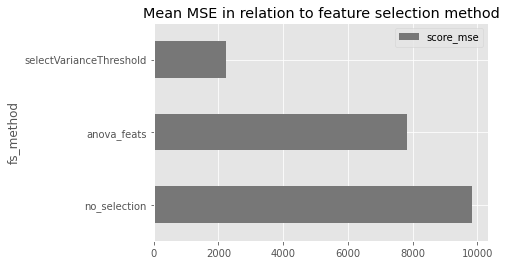

In [68]:
df[['fs_method','score_mse']].groupby('fs_method').agg('mean').sort_values('score_mse', ascending= False).plot(kind='barh', color = cycle_colors[3]);
plt.title('Mean MSE in relation to feature selection method');

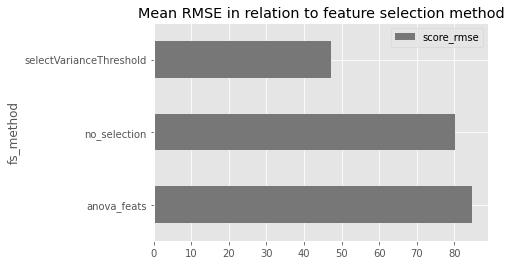

In [70]:
df[['fs_method','score_rmse']].groupby('fs_method').agg('mean').sort_values('score_rmse', ascending= False).plot(kind='barh', color = cycle_colors[3]);
plt.title('Mean RMSE in relation to feature selection method');

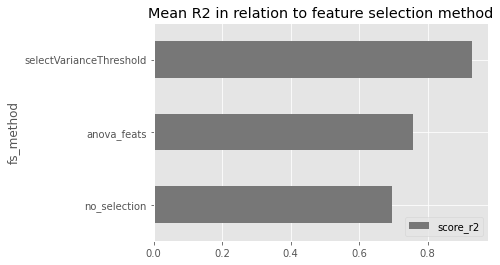

In [73]:
df[['fs_method','score_r2']].groupby('fs_method').agg('mean').sort_values('score_r2', ascending= True).plot(kind='barh', color = cycle_colors[3]);
plt.title('Mean R2 in relation to feature selection method');